In [38]:
import numpy as np
import pandas as pd

In [39]:
data=pd.read_excel("客户年消费数据.xlsx")
#缺失检查
print(data.isnull().sum())
print(data.isna().sum(),data.head(),sep="\n")

id                  0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64
id                  0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64
   id  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   1  12669  9656     7561     214              2674          1338
1   2   7057  9810     9568    1762              3293          1776
2   3   6353  8808     7684    2405              3516          7844
3   4  13265  1196     4221    6404               507          1788
4   5  22615  5410     7198    3915              1777          5185


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

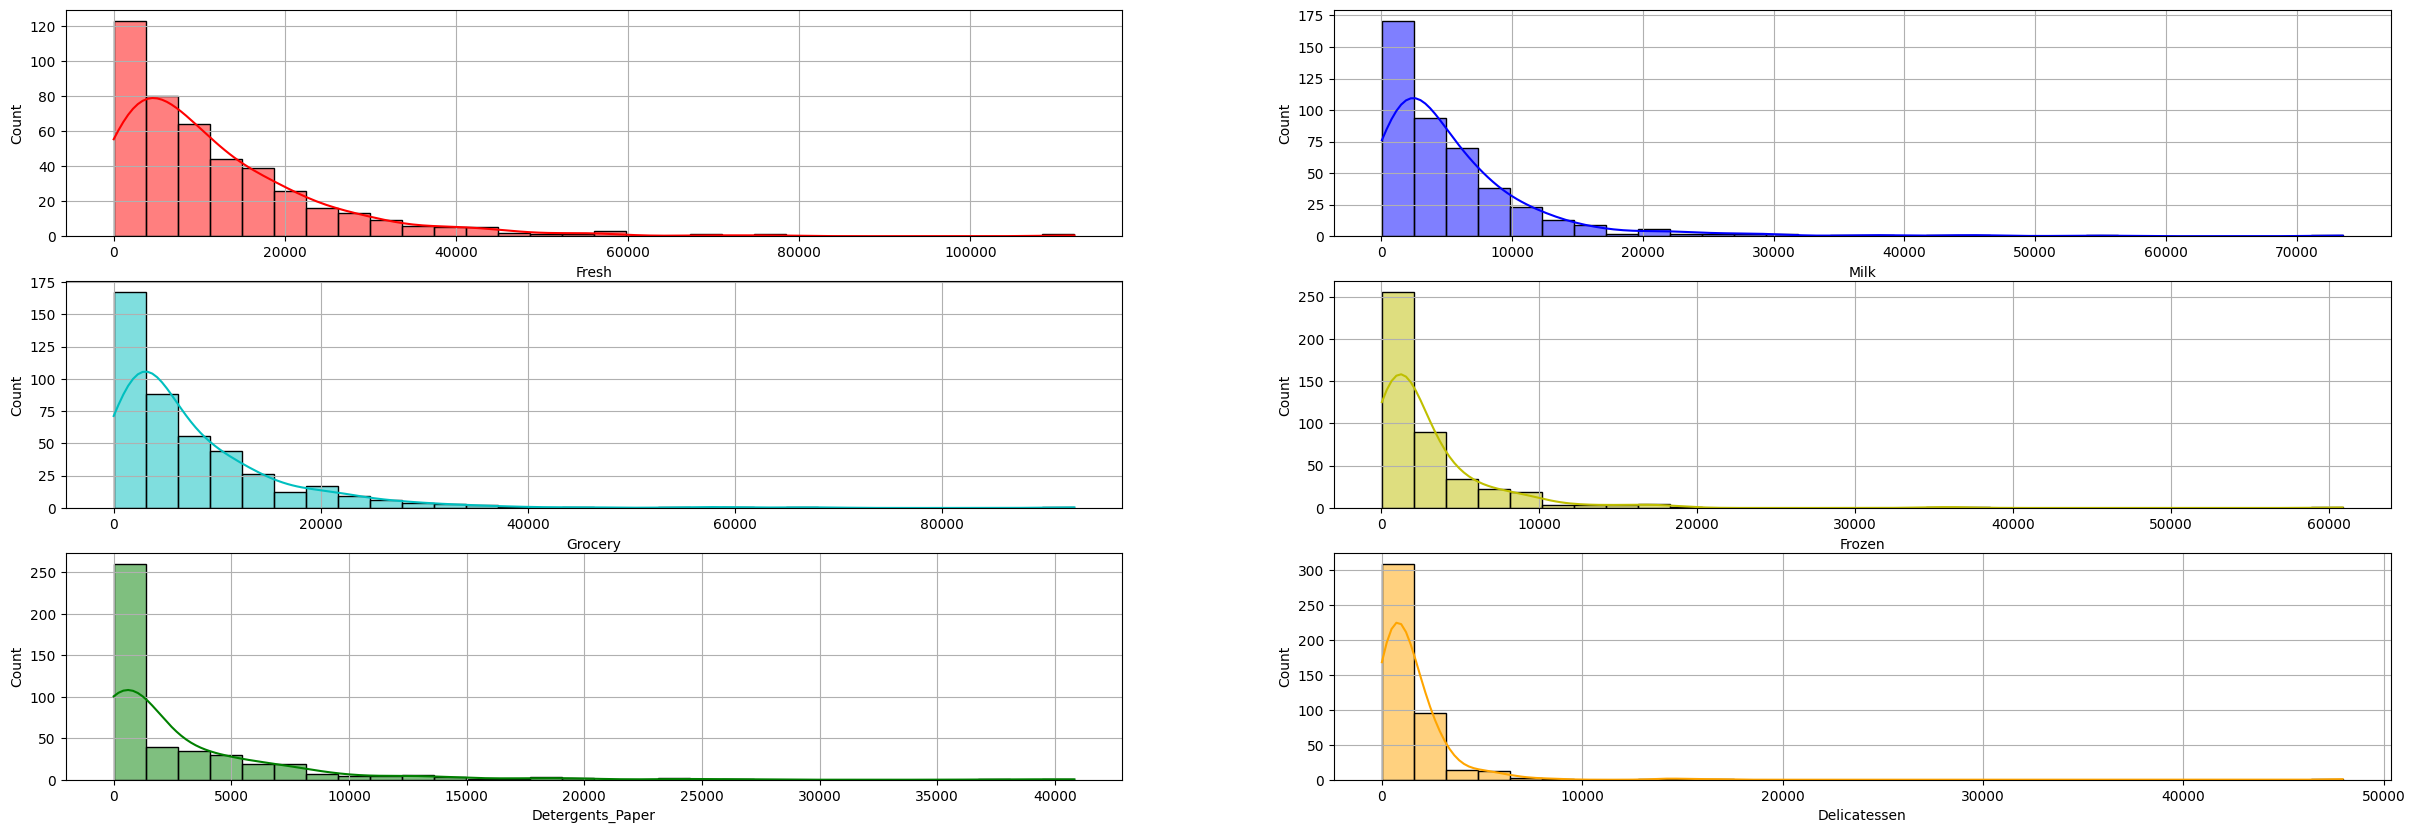

In [4]:
fig = plt.figure(figsize=(30,10))
col=['r','b','c','y','g','orange']
for idx, name in enumerate(list(data.columns)[1:]):
    plt.subplot(3,2,idx+1)
    plt.grid()
    sns.histplot(data[name],bins=30,kde=True,element='bars',stat='count',color=col[idx])
    # 95分位数过滤
    #plt.hist(data[name][ data[name]<np.percentile(data[name],95) ], bins=20,histtype='bar',align='left', rwidth=1,color=col[idx],label=name)

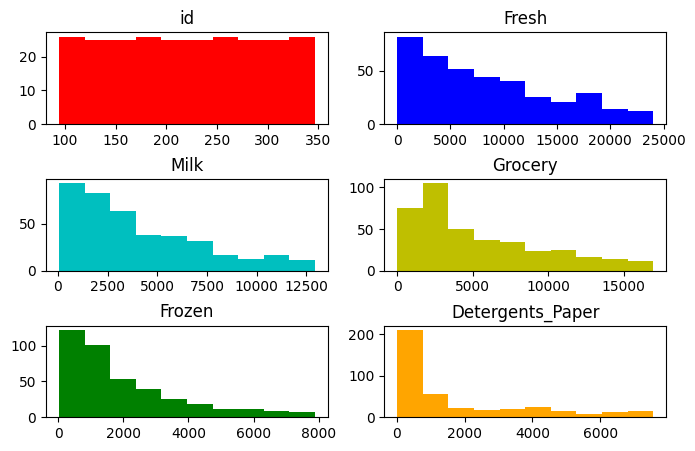

In [5]:
names=list(data.columns)
pic,ax=plt.subplots(nrows=3,ncols=2,figsize=(8,5),gridspec_kw={"hspace": 0.6, "wspace": 0.2})
for i in range(3):
    for j in range(2):
        # 三倍标准差过滤
        name = names[i*2+j]
        std3=np.std(data[name])   #np.std(data.iloc[:,i*2+j]) * 3
        mean=np.mean(data[name])  #np.mean(data.iloc[:,i*2+j])
        ax[i][j].set_title(name)  #(names[i*2+j])
        ax[i][j].hist(data[name][(data[name]>(mean-std3)) & (data[name]<(std3+mean))],color=col[i*2+j])


In [97]:
features = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]
# 计算每一列的平均值及标准差
meandata = np.mean(features, axis=0) 
stddata = np.std(features, axis=0)
# 均值归一化
features = (features - meandata) / stddata    

# 求协方差矩阵
cov = np.cov(features.transpose()) # np.cov(features.T)
# 求解特征值和特征向量
eigVals, eigVectors = np.linalg.eig(cov) 
print(eigVals)
print('前两个主成分包含的信息百分比：{:.2%}'.format(np.sum(eigVals[:2])/np.sum(eigVals)))
print(eigVals/eigVals.sum())
print(np.cumsum(eigVals/eigVals.sum()))

# 选择前两个特征向量
pca_mat = eigVectors[:,:2]
pca_data = np.dot(features , pca_mat)
pca_data = pd.DataFrame(pca_data, columns=['pca1', 'pca2'])
print(pca_data.head())

# 两个主成分的散点图
'''
plt.subplot(111)
plt.scatter(pca_data['pca1'], pca_data['pca2'])
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.show()
'''


# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov)
print(eigenvalues)
# 将特征向量按照特征值排序
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 选择前 n 个主成分
n_components = 6
selected_eigenvectors = sorted_eigenvectors[:, :n_components]
# 将数据投影到选定的主成分上
#projected_data = np.dot(data_std, selected_eigenvectors)
# 输出特征向量的方差解释比例
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio[:n_components])

# 输出特征向量的累计方差解释比例
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio[:n_components])


[2.65099857 1.70646229 0.74175057 0.56501435 0.06311455 0.28632709]
前两个主成分包含的信息百分比：72.46%
[0.44082893 0.283764   0.12334413 0.09395504 0.01049519 0.04761272]
[0.44082893 0.72459292 0.84793705 0.94189209 0.95238728 1.        ]
       pca1      pca2
0 -0.193291  0.305100
1 -0.434420  0.328413
2 -0.811143 -0.815096
3  0.778648 -0.652754
4 -0.166287 -1.271434
[2.65099857 1.70646229 0.74175057 0.56501435 0.06311455 0.28632709]
Explained Variance Ratio: [0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]
Cumulative Explained Variance Ratio: [0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


In [88]:
eigVals/eigVals.sum()

array([0.44082893, 0.283764  , 0.12334413, 0.09395504, 0.01049519,
       0.04761272])

In [81]:
print(eigenvalues)
eigenvalues[np.argsort(eigenvalues)[::-1]]
eigenvectors[[np.argsort(eigenvalues)[::-1]]]

[2.65099857 1.70646229 0.74175057 0.56501435 0.06311455 0.28632709]


array([[[-0.04288396, -0.52793212, -0.81225657, -0.23668559,
          0.03602539,  0.04868278],
        [-0.54511832, -0.08316765,  0.06038798, -0.08718991,
          0.03804019, -0.82657929],
        [-0.57925635,  0.14608818, -0.10838401,  0.10598745,
         -0.72174458,  0.31499943],
        [-0.05118859, -0.61127764,  0.17838615,  0.76868266,
          0.01563715,  0.02793224],
        [-0.24868198, -0.50420705,  0.52390412, -0.55206472,
          0.07513412,  0.31470051],
        [-0.5486402 ,  0.25523316, -0.13619225,  0.17174406,
          0.68589373,  0.33964012]]])

In [204]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dt=pd.read_excel("客户年消费数据.xlsx")
features=dt[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
#print(features_std)
pca = PCA()
pca.fit(features_std)

# 获取主成分
principal_components = pca.transform(features_std)

# 创建一个新的数据框来存储主成分
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'])

# 输出主成分的方差解释比例
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 输出特征向量的解释方差
explained_variance = pca.explained_variance_
print("Explained Variance:", explained_variance)

# 输出特征向量的累计方差解释比例
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)



Explained Variance Ratio: [0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]
Explained Variance: [2.65099857 1.70646229 0.74175057 0.56501435 0.28632709 0.06311455]
Cumulative Explained Variance Ratio: [0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


[2.65099857 1.70646229 0.74175057 0.56501435 0.28632709 0.06311455]


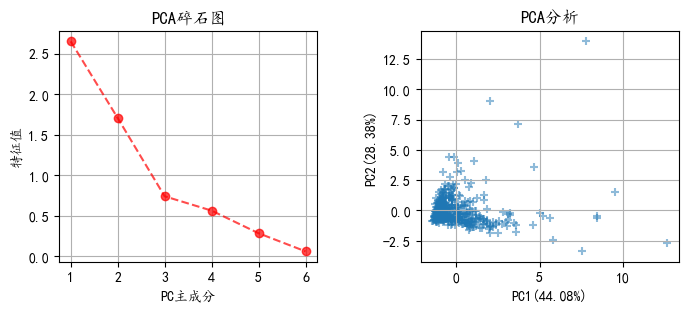

In [207]:
print(sorted_eigenvalues)
fig,axx=plt.subplots(1,2,figsize=(8,3),gridspec_kw={"hspace": 0.6, "wspace": 0.4})
#ax.scatter(range(0,6),sorted_eigenvalues)
# 支持中文
plt.rc("font",family='KaiTi')
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

ax=axx[0]
ax.plot(range(1,7),sorted_eigenvalues ,color='r',marker='o',linewidth=1.5,alpha=0.7,linestyle='--')
ax.set_title('PCA碎石图')
ax.set_xlabel('PC主成分')
ax.set_ylabel('特征值')
ax.grid()
bx=axx[1]
bx.scatter(principal_df.iloc[:,0],principal_df.iloc[:,1],marker='+',alpha=0.5)
bx.set_xlabel('PC1({:.2%})'.format(explained_variance_ratio[0]))
bx.set_ylabel('PC2({:.2%})'.format(explained_variance_ratio[1]))
bx.set_title('PCA分析')
bx.grid()

In [213]:
from sklearn.cluster import KMeans

2 Counter({0: 395, 1: 45})
3 Counter({1: 393, 0: 44, 2: 3})
4 Counter({0: 325, 3: 101, 1: 11, 2: 3})
5 Counter({3: 267, 1: 94, 4: 65, 0: 11, 2: 3})
6 Counter({5: 244, 3: 100, 0: 65, 2: 23, 1: 5, 4: 3})


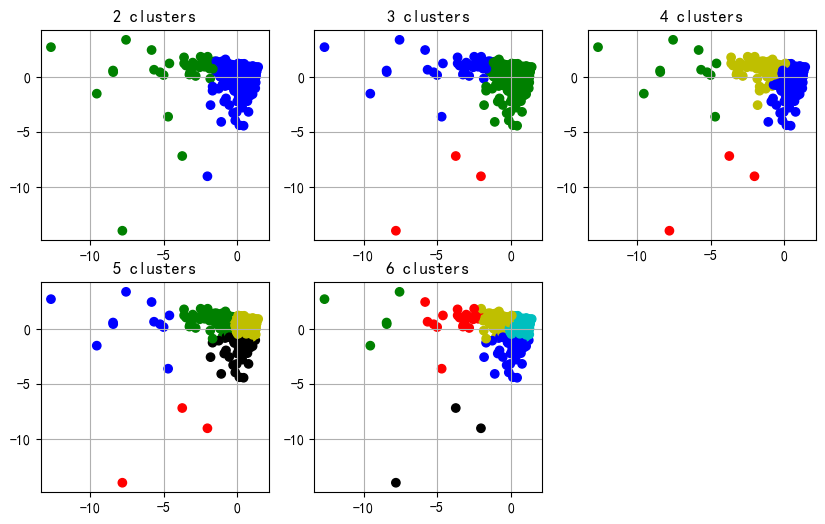

In [264]:
from collections import Counter
colors = ['b', 'g', 'r', 'y', 'k', 'c', 'm', 'chartreuse']
plt.figure(figsize=(10,6))
for i in range(2,7):
    kmeans = KMeans(n_clusters=i,random_state=0,n_init=10)
    clus = kmeans.fit(pca_data)
    print(i,Counter(clus.labels_))
    
    color = [colors[i] for i in clus.labels_]
    plt.subplot(2,3,i-1)
    plt.scatter(pca_data['pca1'],pca_data['pca2'],color=color)
    plt.title('{} clusters'.format(str(i)))
    plt.grid()



array([2, 3, 4])

In [194]:
from matplotlib.font_manager import FontManager

mpl_fonts = set(f.name for f in FontManager().ttflist)
print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print(f)

all font list get from matplotlib.font_manager:
Arial
Bahnschrift
Book Antiqua
Bookman Old Style
Bookshelf Symbol 7
Calibri
Cambria
Candara
Century
Century Gothic
Comic Sans MS
Consolas
Constantia
Corbel
Courier New
DejaVu Math TeX Gyre
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
DengXian
Dubai
Ebrima
FZShuTi
FZYaoTi
FangSong
Fira Code
Franklin Gothic Medium
Gabriola
Gadugi
Garamond
Georgia
HoloLens MDL2 Assets
Impact
Ink Free
Javanese Text
KaiTi
Leelawadee
Leelawadee UI
LiSu
Lucida Console
Lucida Sans Unicode
MS Gothic
MS Reference Sans Serif
MS Reference Specialty
MT Extra
MV Boli
Malgun Gothic
Microsoft Himalaya
Microsoft JhengHei
Microsoft New Tai Lue
Microsoft PhagsPa
Microsoft Sans Serif
Microsoft Tai Le
Microsoft Uighur
Microsoft YaHei
Microsoft Yi Baiti
MingLiU-ExtB
Mongolian Baiti
Monotype Corsiva
Myanmar Text
Nirmala UI
Palatino Linotype
STCaiyun
STFangsong
STHupo
STIXGeneral
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeOneSym
